In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from numpy import array
from numpy import asarray
from numpy import zeros
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import Model
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers import Input
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
from keras.layers.merge import Concatenate

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/E-RCV"

'Alodokter - Alodokter.csv'   combined_slang_words.txt	 glove.6B.100d.txt
 clean_data.csv		      combined_stop_words.txt


In [ ]:
curhat = pd.read_csv("/content/drive/MyDrive/E-RCV/clean_data.csv")

In [ ]:
print(curhat.shape)

curhat.head()

(1342, 13)


,Curhat,Judul,Link,Topic,Keluarga,Percintaan,Anak Remaja,Pengembangan Diri,Trauma,Phobia,Masalah Emosi,Bullying,Bukan Psikologi
0,sore dok nama naomi menghilangkan trauma kecil...,Trauma masa kecil tentang bully,https://www.alodokter.com/komunitas/topic/trau...,Trauma,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,selamat malam dok melakukan operasi benjolan d...,gatal dan bengkak pada bekas luka operasi,https://www.alodokter.com/komunitas/topic/gata...,Trauma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,selamat sore dok jatuh ketingian 4meter sedaka...,Solusi atasi ngilu pada kaki setelah terjatuh ...,https://www.alodokter.com/komunitas/topic/apa-...,Trauma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,dok habis jatuh motor badan dok selang 4jam ha...,Penyebab anus terasa sakit setelah terjatuh da...,https://www.alodokter.com/komunitas/topic/apa-...,Trauma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,selamat siang dok gini dok tenggorokan gusi 3 ...,Tenggorokan dan gusi disebelah kanan sakit,https://www.alodokter.com/komunitas/topic/teng...,Trauma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
filter = curhat["Curhat"] != ""
curhat = curhat[filter]
curhat = curhat.dropna()

In [ ]:
print(curhat["Curhat"][108])

assallammualaikum wr wbselamat malam dok dok kakak bola matanya keluar matanya merah susah berkomunikasi susah menangkap lakukan rayu makan lain-lain dokter disini keadaan kesehatannya dok sehat darah dllnya normal dok gejala sakau iya dok kakak kenal narkotika, psikotropika, obat terlarang teman nya ketangkep garagara pemilik barang sabu sabu dok mohon penjelasannya dokterimakasih wassallammualaikum wr wb


In [ ]:
print("keluarga:" + str(curhat["Keluarga"][108]))
print("percintaan:" + str(curhat["Percintaan"][108]))
print("anak remaja:" + str(curhat["Anak Remaja"][108]))
print("pengembangan diri:" + str(curhat["Pengembangan Diri"][108]))
print("trauma:" + str(curhat["Trauma"][108]))
print("phobia:" + str(curhat["Phobia"][108]))
print("masalah emosi:" + str(curhat["Masalah Emosi"][108]))
print("bullying:" + str(curhat["Bullying"][108]))
print("bukan psikologi:" + str(curhat["Bukan Psikologi"][108]))

keluarga:0.0
percintaan:0.0
anak remaja:0.0
pengembangan diri:0.0
trauma:0.0
phobia:0.0
masalah emosi:0.0
bullying:0.0
bukan psikologi:1.0


In [ ]:
curhat_labels = curhat[["Keluarga", "Percintaan", "Anak Remaja", "Pengembangan Diri", "Trauma", "Phobia", "Masalah Emosi", "Bullying", "Bukan Psikologi"]]
curhat_labels.head()

,Keluarga,Percintaan,Anak Remaja,Pengembangan Diri,Trauma,Phobia,Masalah Emosi,Bullying,Bukan Psikologi
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


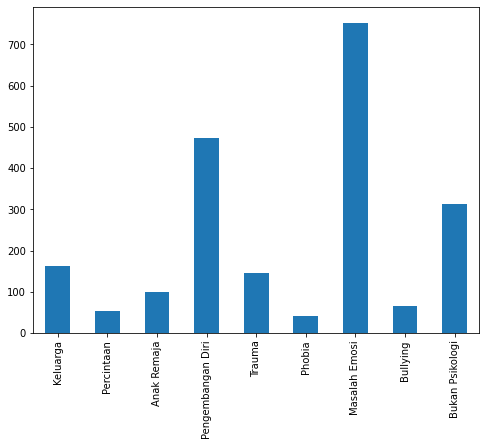

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

curhat_labels.sum(axis=0).plot.bar()

In [ ]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
kalimat = list(curhat["Curhat"])
for isi in kalimat:
    X.append(preprocess_text(isi))

y = curhat[["Keluarga", "Percintaan", "Anak Remaja", "Pengembangan Diri", "Trauma", "Phobia", "Masalah Emosi", "Bullying", "Bukan Psikologi"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, test_size = 0.20, random_state = 42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1073
1073
269
269


In [ ]:
y1_train = y_train[["Keluarga"]].values
y1_test =  y_test[["Keluarga"]].values

y2_train = y_train[["Percintaan"]].values
y2_test =  y_test[["Percintaan"]].values

y3_train = y_train[["Anak Remaja"]].values
y3_test =  y_test[["Anak Remaja"]].values

y4_train = y_train[["Pengembangan Diri"]].values
y4_test =  y_test[["Pengembangan Diri"]].values

y5_train = y_train[["Trauma"]].values
y5_test =  y_test[["Trauma"]].values

y6_train = y_train[["Phobia"]].values
y6_test =  y_test[["Phobia"]].values

y7_train = y_train[["Masalah Emosi"]].values
y7_test =  y_test[["Masalah Emosi"]].values

y8_train = y_train[["Bullying"]].values
y8_test =  y_test[["Bullying"]].values

y9_train = y_train[["Bukan Psikologi"]].values
y9_test =  y_test[["Bukan Psikologi"]].values

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/E-RCV/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output7 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output8 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output9 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6, output7, output8, output9])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     697100      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
______________________________________________________________________________________________

In [ ]:
history = model.fit(x=X_train, y=[y1_train, 
                                  y2_train, 
                                  y3_train,
                                  y4_train,
                                  y5_train,
                                  y6_train,
                                  y7_train,
                                  y8_train,
                                  y9_train], 
                    batch_size=8192, epochs=100, verbose=1, validation_split=0.20, shuffle=True)

Epoch 1/100
1/1 [==============================] - 23s 23s/step - loss: 6.2381 - dense_loss: 0.6933 - dense_1_loss: 0.6929 - dense_2_loss: 0.6928 - dense_3_loss: 0.6930 - dense_4_loss: 0.6930 - dense_5_loss: 0.6934 - dense_6_loss: 0.6932 - dense_7_loss: 0.6931 - dense_8_loss: 0.6933 - dense_acc: 0.8671 - dense_1_acc: 0.9452 - dense_2_acc: 0.9114 - dense_3_acc: 0.6550 - dense_4_acc: 0.8916 - dense_5_acc: 0.9429 - dense_6_acc: 0.4382 - dense_7_acc: 0.9510 - dense_8_acc: 0.7611 - val_loss: 6.2193 - val_dense_loss: 0.6921 - val_dense_1_loss: 0.6896 - val_dense_2_loss: 0.6902 - val_dense_3_loss: 0.6930 - val_dense_4_loss: 0.6901 - val_dense_5_loss: 0.6903 - val_dense_6_loss: 0.6927 - val_dense_7_loss: 0.6896 - val_dense_8_loss: 0.6916 - val_dense_acc: 0.8558 - val_dense_1_acc: 0.9628 - val_dense_2_acc: 0.9302 - val_dense_3_acc: 0.6465 - val_dense_4_acc: 0.8930 - val_dense_5_acc: 0.9628 - val_dense_6_acc: 0.5535 - val_dense_7_acc: 0.9302 - val_dense_8_acc: 0.7488
Epoch 2/100
1/1 [===========

In [ ]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

9/9 [==============================] - 1s 66ms/step - loss: 6.0857 - dense_loss: 0.6821 - dense_1_loss: 0.6666 - dense_2_loss: 0.6702 - dense_3_loss: 0.6908 - dense_4_loss: 0.6739 - dense_5_loss: 0.6672 - dense_6_loss: 0.6929 - dense_7_loss: 0.6643 - dense_8_loss: 0.6775 - dense_acc: 0.8922 - dense_1_acc: 0.9665 - dense_2_acc: 0.9405 - dense_3_acc: 0.6431 - dense_4_acc: 0.8922 - dense_5_acc: 0.9814 - dense_6_acc: 0.5130 - dense_7_acc: 0.9591 - dense_8_acc: 0.7398
Test Score: 6.085727691650391
Test Accuracy: 0.6821446418762207


In [ ]:
import tensorflow as tf

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

3380268

In [ ]:
from google.colab import files

files.download(tflite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>